In [2]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

In [3]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

In [4]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

## Review

**Review Question**

In [5]:
families = Table.read_table('family_heights.csv')
families.show(6)

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male


Note: Child heights are the **adult** heights of children in a family

In [6]:
families.sort('family', descending=True).show(6)

family,father,mother,child,children,order,sex
99,69,66,73,8,1,male
99,69,66,72,8,2,male
99,69,66,71.7,8,3,male
99,69,66,71.5,8,4,male
99,69,66,65.5,8,5,female
99,69,66,65,8,6,female


In [7]:
families.where('family', are.equal_to('5'))

family,father,mother,child,children,order,sex
5,75,58.5,72,6,1,male
5,75,58.5,69,6,2,male
5,75,58.5,68,6,3,male
5,75,58.5,66.5,6,4,female
5,75,58.5,62.5,6,5,female
5,75,58.5,62.5,6,6,female


## New material

**Review Question**

### How can we predict the outcome of a new individual?

We will now average the heights of the parents and create a table with two columns:

- Parent average height
- Child height

In [9]:
families = Table.read_table('family_heights.csv')
parent_avgs = (families.column('father') + families.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
)
heights.sample().show(6)

Parent Average,Child
69.5,71
63.5,64
65.75,66
62.75,68
66.25,65
68.5,72


**Review Question**

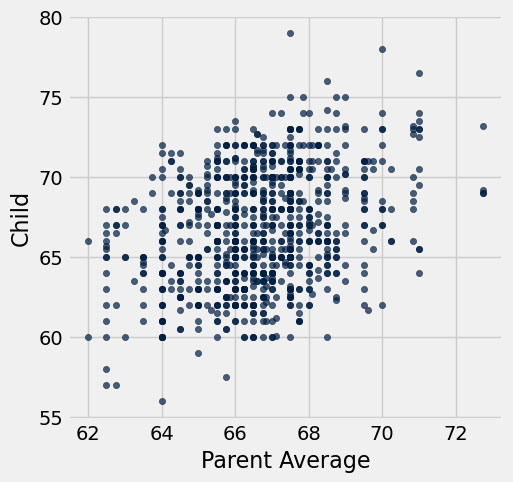

In [10]:
heights.scatter('Parent Average', 'Child')

In [11]:
nearby = heights.where('Parent Average', are.between(67.5, 68.5))
nearby_mean = np.average(nearby.column('Child'))
nearby_mean

67.620000000000005

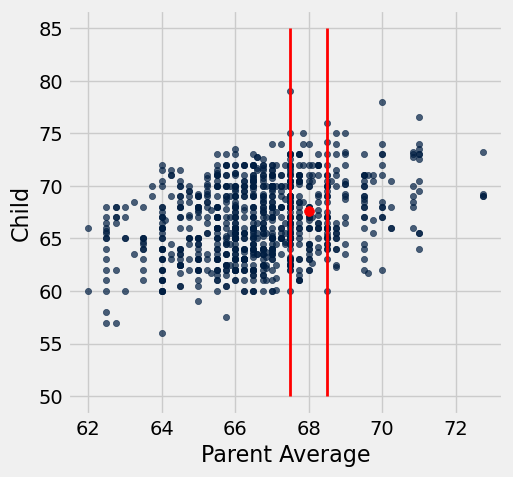

In [12]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [13]:
def predict_child(h):
    """Predict the height of a child whose parents have a parent average height of p_avg.
    
    The prediction is the average height of the children whose parent average height is
    in the range p_avg plus or minus 0.5.
    """
    nearby = heights.where('Parent Average', are.between(h - 1/2, h + 1/2))
    return np.average(nearby.column('Child'))

In [14]:
heights_with_predictions = heights.with_columns(
    'Prediction', heights.apply(predict_child, 'Parent Average'))

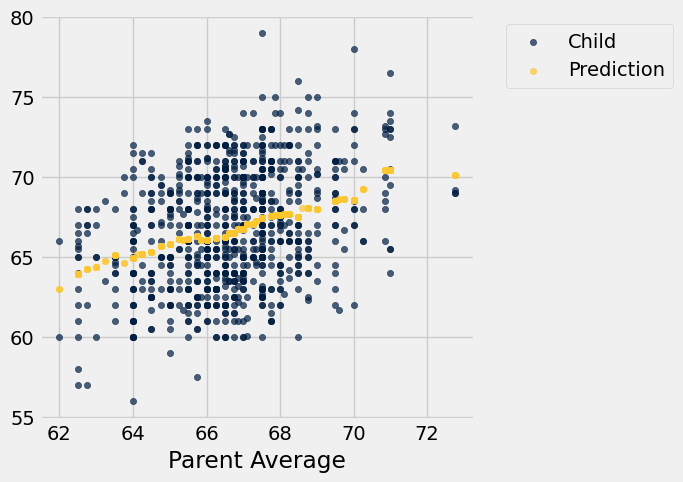

In [15]:
heights_with_predictions.scatter('Parent Average')

### Is there an association between two variables?

In [16]:
hybrid = Table.read_table('hybrid.csv')

In [17]:
hybrid.sample().show(6)

vehicle,year,msrp,acceleration,mpg,class
Altima,2006,29524.8,13.29,32.93,Midsize
Prius alpha (V),2011,30588.3,10,72.92,Midsize
Insight,2011,18254.4,9.52,41,Compact
MKZ FWD,2013,35925,14.03,45,Midsize
RX 450h,2010,42812.5,13.89,30,SUV
Civic,2003,14071.9,8.62,41,Compact


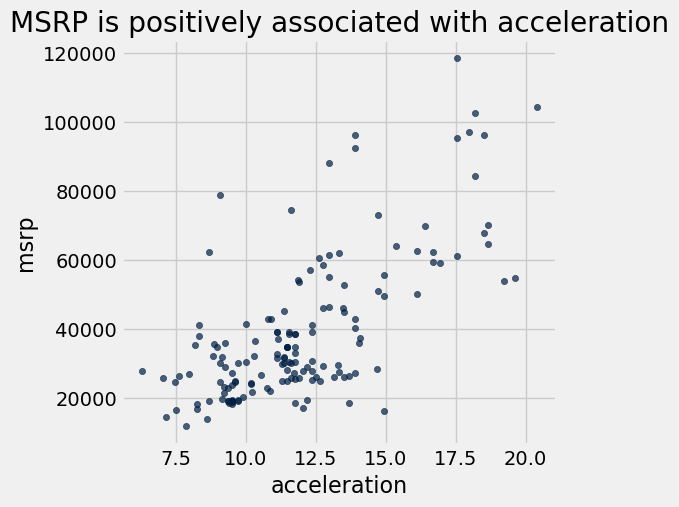

In [18]:
hybrid.scatter('acceleration', 'msrp')
plots.title('MSRP is positively associated with acceleration');

In [19]:
suv = hybrid.where('class', 'SUV')
suv.num_rows

39

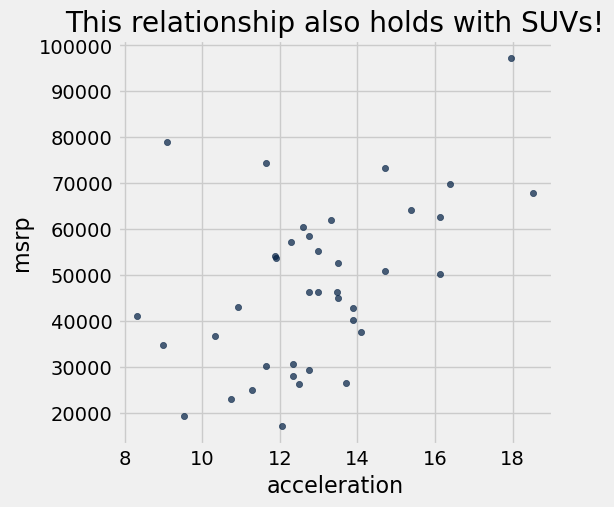

In [20]:
suv.scatter('acceleration', 'msrp')
plots.title('This relationship also holds with SUVs!');

_____

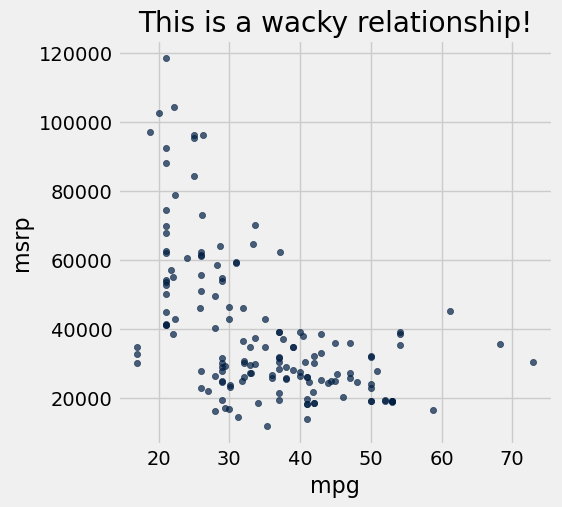

In [21]:
hybrid.scatter('mpg', 'msrp')
plots.title('This is a wacky relationship!');

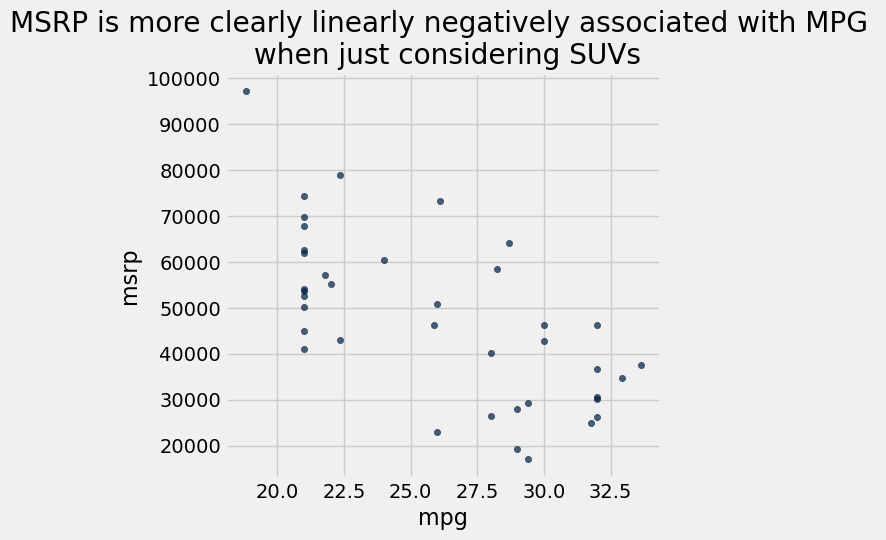

In [22]:
suv.scatter('mpg', 'msrp')
plots.title("MSRP is more clearly linearly negatively associated with MPG \n when just considering SUVs");

_______

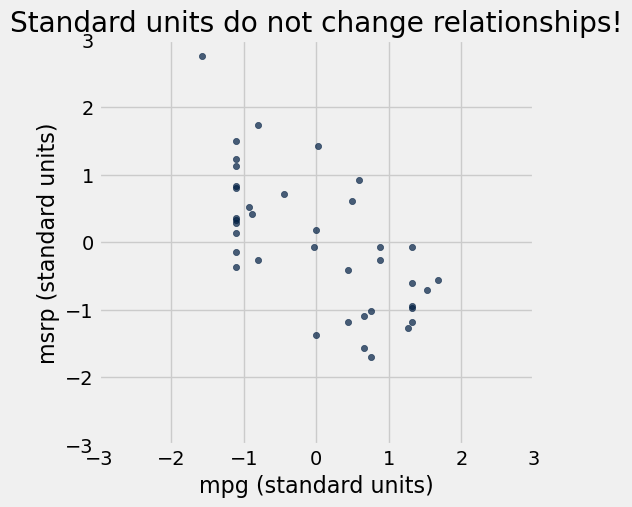

In [23]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);
plots.title('Standard units do not change relationships!');

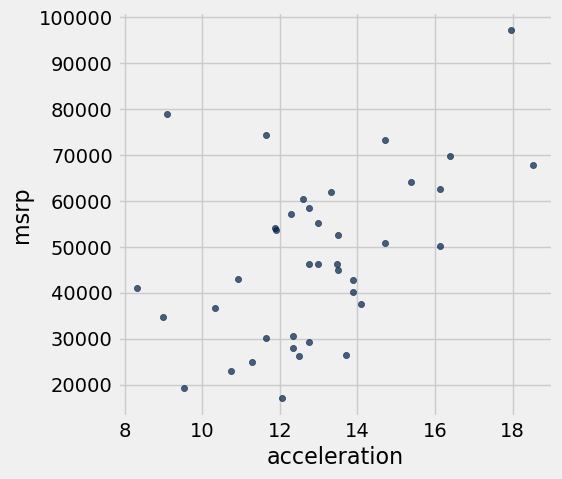

In [24]:
suv.scatter('acceleration', 'msrp')

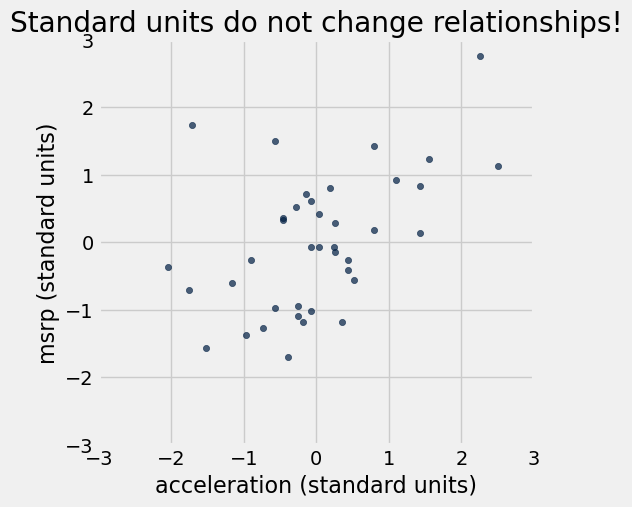

In [25]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);
plots.title('Standard units do not change relationships!');

### $r$ helps us measure correlation

**Review Question**

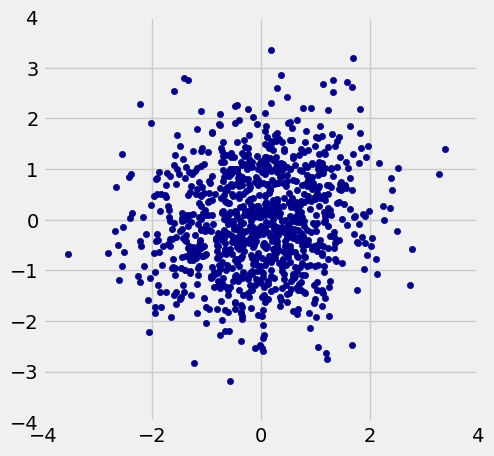

In [49]:
r_scatter(0.1)

In [ ]:
r_scatter(1)

In [ ]:
r_scatter(0)

In [50]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


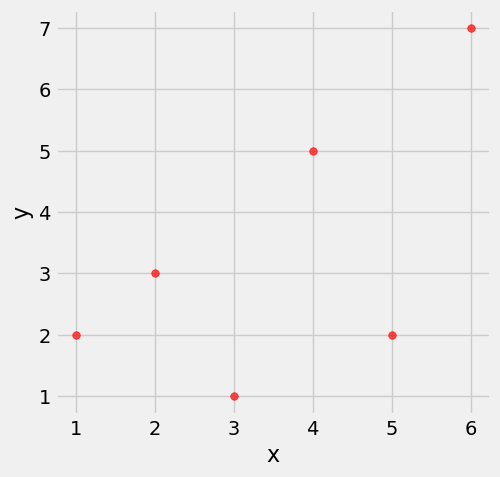

In [51]:
t.scatter('x', 'y', s=30, color='red')

In [52]:
t = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


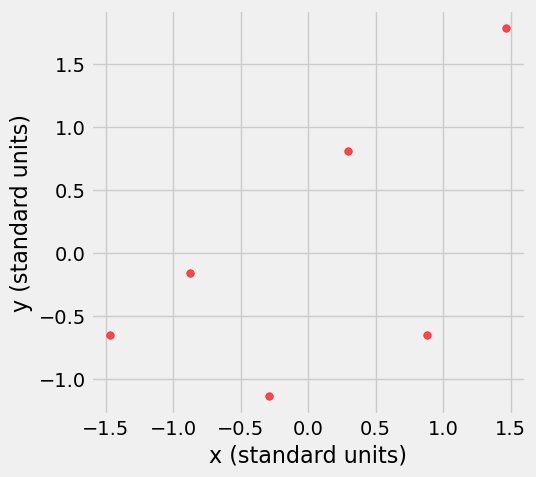

In [53]:
t.scatter(2, 3, s=30, color='red')

### Here’s a more technical definition of $r$!


In [62]:
t = t.with_columns(
    'product of standard units', t.column(3) * t.column(2))
t

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [55]:
r = np.average(t.column(2) * t.column(3))
r

0.61741639718977093

In [56]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

In [57]:
correlation(t, 'x', 'y')

0.61741639718977093

_______

In [58]:
correlation(hybrid, 'acceleration', 'msrp')

0.69557789969139783

In [59]:
correlation(hybrid, 'mpg', 'msrp')

-0.53182636336837863

In [60]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

**Review Question**

In [63]:
correlation(t, 'x', 'y')

0.61741639718977093

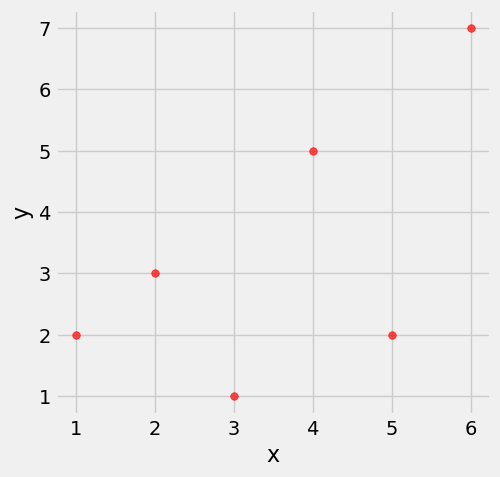

In [64]:
t.scatter('x', 'y', s=30, color='red')

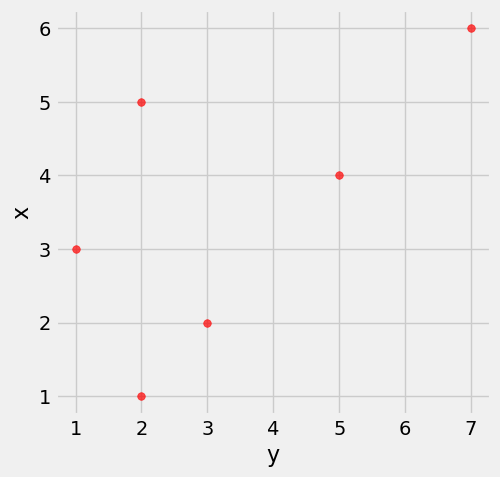

In [65]:
t.scatter('y', 'x', s=30, color='red')

In [66]:
correlation(t, 'y', 'x')

0.61741639718977093

### It's always good to pair a calculation of $r$ with a visualization.

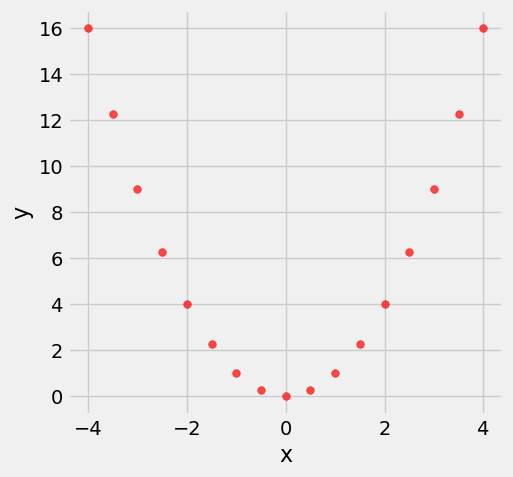

In [67]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [68]:
correlation(nonlinear, 'x', 'y')

0.0

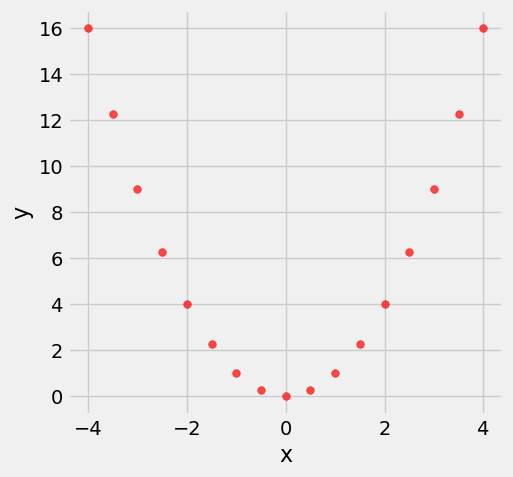

In [69]:
nonlinear.scatter('x', 'y', s=30, color='r')

In [72]:
correlation(hybrid, 'mpg', 'msrp')

-0.53182636336837863

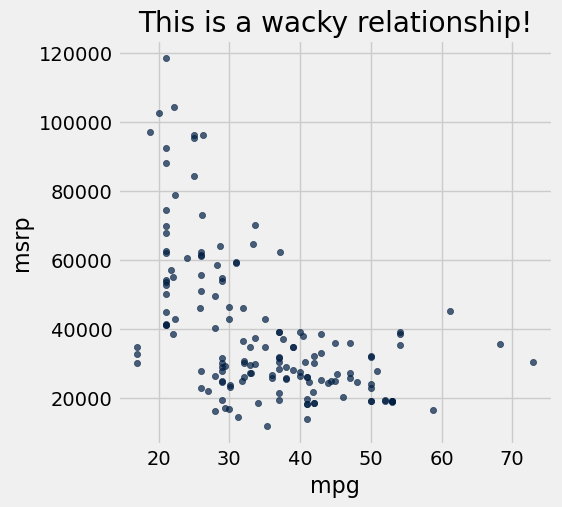

In [71]:
hybrid.scatter('mpg', 'msrp')
plots.title('This is a wacky relationship!');

### Be careful with how you interpret $r$!

#### Outliers can greatly affect the value of $r$

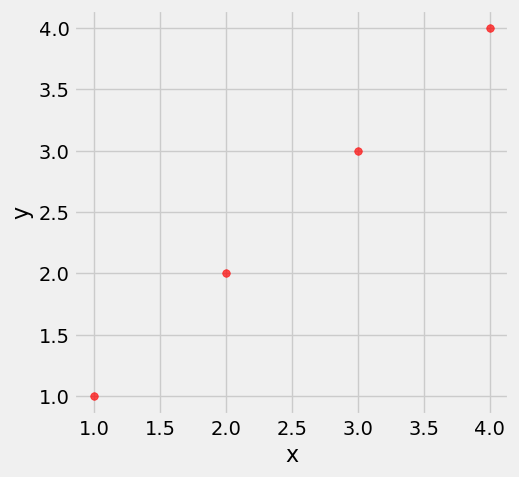

In [73]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [74]:
correlation(line, 'x', 'y')

1.0

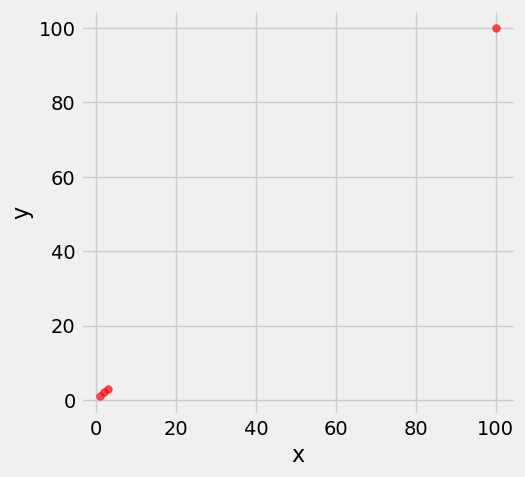

In [75]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 100),
        'y', make_array(1, 2, 3, 100)
    )
line.scatter('x', 'y', s=30, color='r')

**Review Question**

In [76]:
correlation(line, 'x', 'y')

1.0

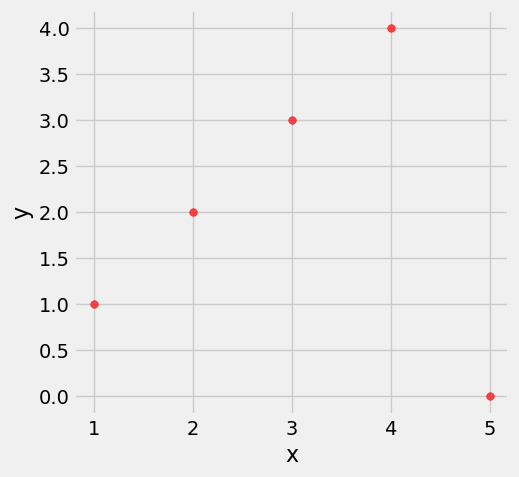

In [77]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [78]:
correlation(outlier, 'x', 'y')

0.0

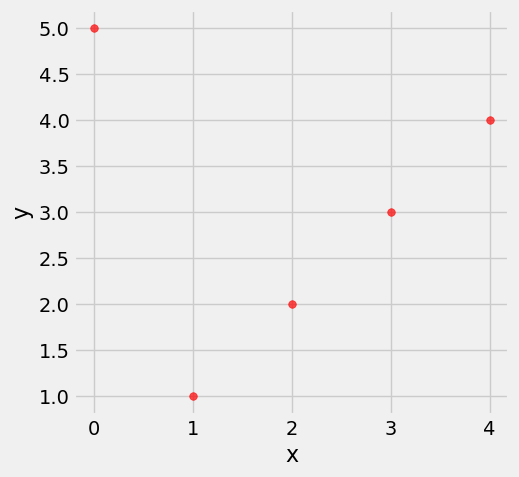

In [79]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 0),
        'y', make_array(1, 2, 3, 4, 5)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [80]:
correlation(outlier, 'x', 'y')

0.0

#### Correlations based on aggregated data can be misleading

In [81]:
sat2014 = Table.read_table('sat_scores.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


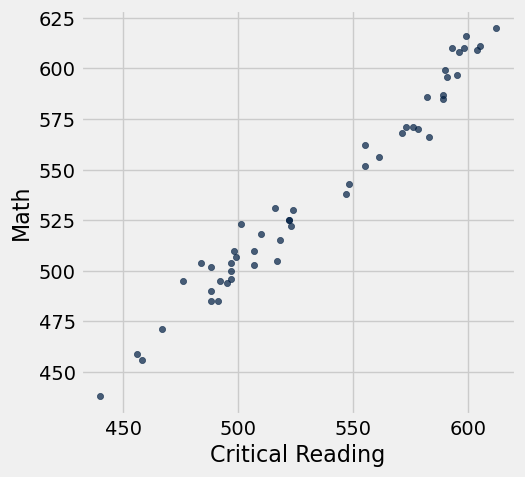

In [82]:
sat2014.scatter('Critical Reading', 'Math')

In [83]:
correlation(sat2014, 'Critical Reading', 'Math')

0.98475584110674341

**Review Question**

In [ ]:
def rate_code(x):
    if x <= 25:
        return 'low'
    elif x <= 50:
        return 'low-moderate'
    elif x <= 75:
        return 'moderate_high'
    else:
        return 'high'

In [ ]:
rate_codes = sat2014.apply(rate_code, 'Participation Rate')

In [ ]:
sat2014 = sat2014.with_columns('Rate Code', rate_codes)
sat2014

In [ ]:
sat2014.scatter('Critical Reading', 'Math', group='Rate Code')
plots.title("Each individual point is not a student!");

In [ ]:
sat2014.where('Rate Code', 'low').show()

In [ ]:
sat2014.where('Rate Code', 'high').show()